# Finding Unsatable Periodic Orbits With Given Initial Conditions


## Coupled Quartic Hamiltonian:

In [78]:
# Importing packages
from numpy.lib.polynomial import poly
import numpy as np
from scipy.integrate import solve_ivp

<function matplotlib.pyplot.show(*args, **kw)>

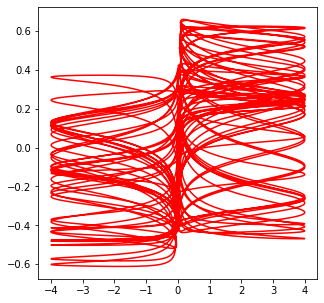

In [128]:
## IVP Solver coupled quartic hamiltonian
"""
Numerical solution of the coupled quartic hamiltonian
"""

# Defining our vector field 
def ham2dof_coupquart(t, x, *parameters):
    
    xDot = np.zeros((4,))

    dVdx = -parameters[3]*x[0] + parameters[4]*x[0]**3 + parameters[6]*(x[0]-x[1])
    dVdy = parameters[5]*x[1] - parameters[6]*(x[0] - x[1])

    xDot[0] = x[2]/parameters[0]
    xDot[1] = x[3]/parameters[1]
    xDot[2] = -dVdx
    xDot[3] = -dVdy

    return xDot

def py_momenta(x, y, px, parameters):

    total_energy = parameters[-1]
    potential_energy = pe_coupquart(x, y, parameters)
    
    if total_energy > (potential_energy + (px**2)/(2*parameters[0])):
        py = np.sqrt(2*parameters[1]*(total_energy - (potential_energy + (px**2)/(2*parameters[0]))))
    
    else:
        py = np.NaN
        
    return py 

def pe_coupquart(x, y, parameters):

    return -(parameters[3]/2)*x**2 + (parameters[4]/4)*x**4 + (parameters[5]/2)*y**2 + (parameters[6]/2)*((x-y)**2)

    # setting parameters for the system
MASS_A = 1
MASS_B = 1
ALPHA = 1
BETA = 4
OMEGA = 0.5
EPSILON = 0.1
TOTAL_ENERGY = 0.01
parameters = np.array([MASS_A, MASS_B, ALPHA, BETA, OMEGA, EPSILON, TOTAL_ENERGY])

    # Define initial conditions and solve parameters
t_span = [0, 500]
x0 = 0.1
y0 = 0.2
px0 = -0.2
py0 = py_momenta(x0, y0, px0, parameters)
y0 = [x0, y0, px0,py0]

relTol = 1e-12
absTol = 1e-9

    # Solving for the trajectories
sol = solve_ivp(ham2dof_coupquart, t_span, y0, method='RK45',rtol = relTol, atol = absTol, args = parameters)

    # Visualising on the 2D potential
import matplotlib.pyplot as plt                                                                                  

fig = plt.figure(figsize = (5,5))
plt.plot(sol.y[0,:], sol.y[1,:], '-r') 
plt.show

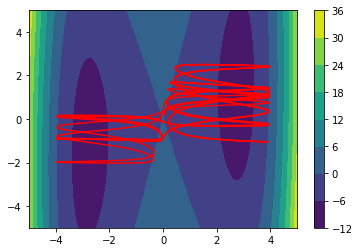

In [124]:
x_values=np.arange(-5,5,0.01)
y_values=np.arange(-5,5,0.01)
X, Y = np.meshgrid(x_values, y_values)

Z = -(parameters[3]/2)*X**2 + (parameters[4]/4)*X**4 + (parameters[5]/2)*Y**2 + (parameters[6]/2)*((X-Y)**2)

cp = plt.contourf(X, Y, Z)
plt.colorbar(cp)
plt.plot(sol.y[0,:], sol.y[1,:], '-r') 